## Data cleanup

In [ ]:
import pandas as pd

# Load the provided CSV files
file_paths = ["filtreeritud_valim.csv", "jarelravi_episoodid_1a.csv", "teraapiad_1a.csv"]

# Reading the files
filtreeritud_valim = pd.read_csv(file_paths[0])
jarelravi_episoodid = pd.read_csv(file_paths[1])
teraapiad = pd.read_csv(file_paths[2])

# Displaying the first few rows of each dataframe to understand their structure
data_overview = {
    "filtreeritud_valim": filtreeritud_valim.head(),
    "jarelravi_episoodid": jarelravi_episoodid.head(),
    "teraapiad": teraapiad.head()
}

data_overview

{'filtreeritud_valim':    Unnamed: 0        id  vanus sugu maakond pohidiagnoos  charlson_total_quan  \
 0           1  ID121340     84    N   Tartu        I63.5                    5   
 1           2   ID42011     58    M   Harju        I63.5                    4   
 2           3   ID70891     80    N   Harju        I63.4                    3   
 3           4   ID77834     74    N   Järva        I63.5                    4   
 4           5   ID64433     66    N   Põlva        I63.0                    6   
 
    charlson_total_original  elixhauser_total_vw  elixhauser_total_swiss  ...  \
 0                        5                    9                       8  ...   
 1                        5                   19                      27  ...   
 2                        4                    8                       9  ...   
 3                        4                   23                      26  ...   
 4                        6                   33                      45  ...  

In [ ]:
# Removing rows where all four therapy types are NA 

# For filtreeritud_valim dataset
therapy_columns_fv = ["fusioteraapia_ar", "logopeedia_ar", "psuhholoogia_ar", "tegevusteraapia_ar"]
filtreeritud_valim_cleaned = filtreeritud_valim.dropna(subset=therapy_columns_fv, how='all')

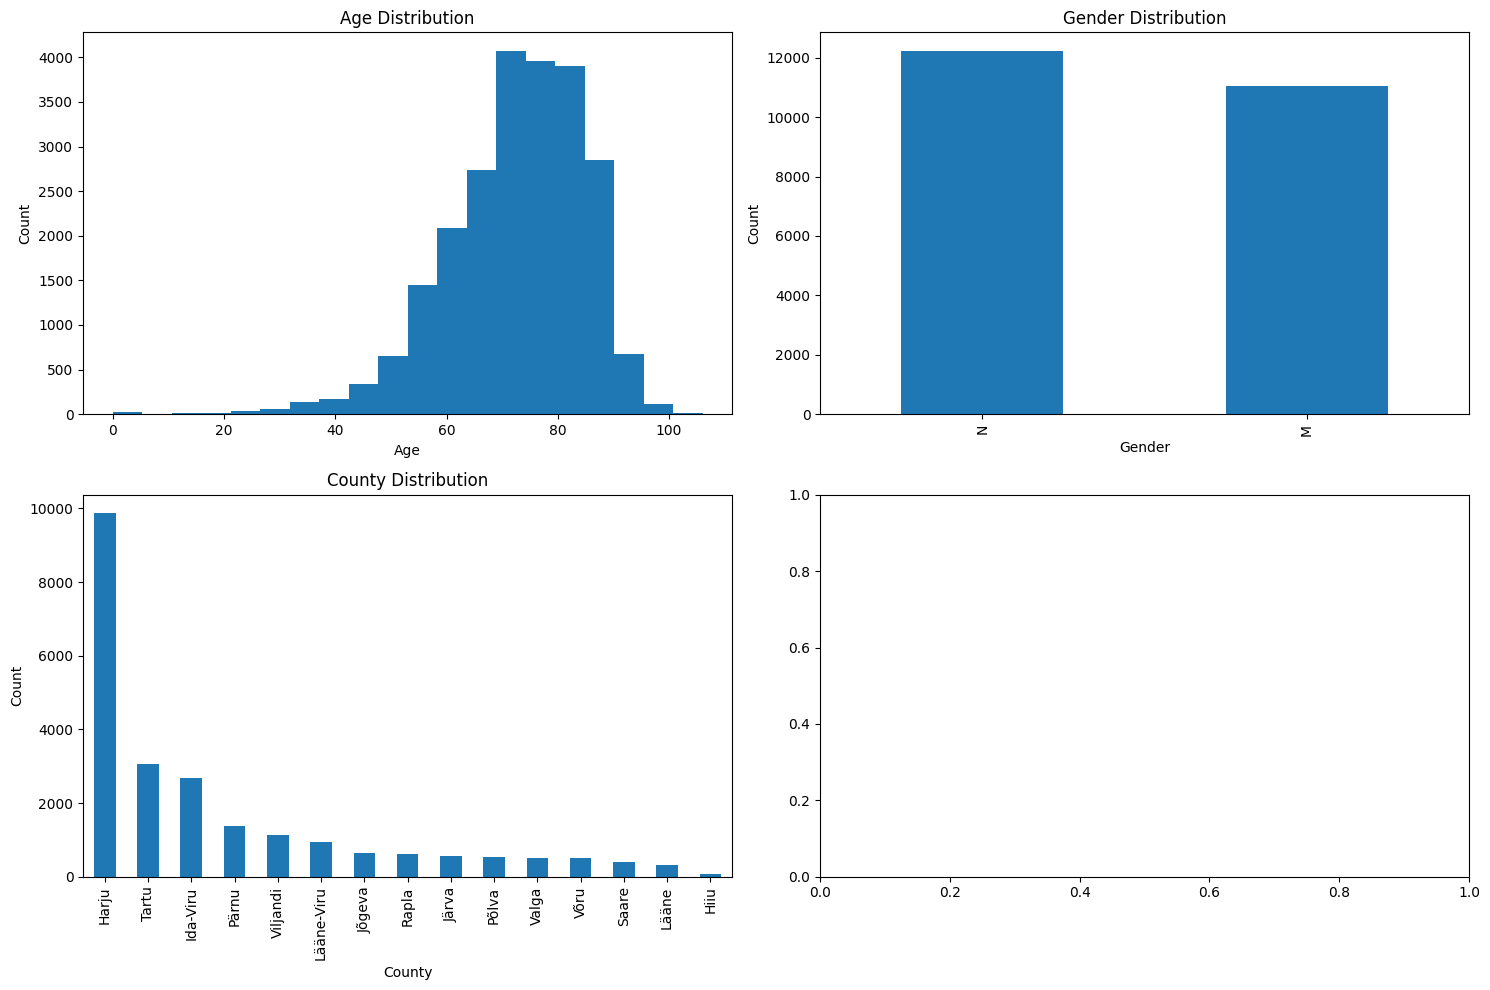

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime

# Assuming filtreeritud_valim, filtreeritud_valim_cleaned, jarelravi_episoodid are predefined dataframes

# Preparing data for the requested visualizations

# Age distribution
age_dist = filtreeritud_valim_cleaned['vanus']

# Gender distribution
gender_dist = filtreeritud_valim_cleaned['sugu'].value_counts()

# County distribution
county_dist = filtreeritud_valim_cleaned['maakond'].value_counts()


# Creating the plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Age distribution plot
# Use the correct axes for the histogram
axes[0, 0].hist(age_dist, bins=20)  # Changed from plt.hist() to axes[0, 0].hist()
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Count')

# Gender distribution plot
gender_dist.plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Gender Distribution')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Count')

# County distribution plot
county_dist.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('County Distribution')
axes[1, 0].set_xlabel('County')
axes[1, 0].set_ylabel('Count')

plt.tight_layout()
plt.show()


In [ ]:
# Reload the original dataset for the revised analysis
df_original = pd.read_csv(file_path)

# Define a function to perform the revised operations for each rehabilitation type
def analyze_revised_rehabilitation_type(df, rehab_type):
    ar_column = f"{rehab_type}_ar"
    a1_column = f"{rehab_type}_1a"

    if ar_column in df.columns and a1_column in df.columns:
        # Remove rows where the "_ar" column is empty or "_ar" is equal to "_1a"
        df_rehab = df.dropna(subset=[ar_column])
        df_rehab = df_rehab[df_rehab[ar_column] != df_rehab[a1_column]]

        # Subtract "_ar" from "_1a"
        df_rehab[f"{rehab_type}_difference"] = df_rehab[a1_column] - df_rehab[ar_column]

        # Calculate the median
        median_value = df_rehab[f"{rehab_type}_difference"].median()
    else:
        median_value = None

    return median_value

# Analyze each rehabilitation type with revised criteria
fusioteraapia_revised_median = analyze_revised_rehabilitation_type(df_original, "fusioteraapia")
psuhholoogia_revised_median = analyze_revised_rehabilitation_type(df_original, "psuhholoogia")
tegevusteraapia_revised_median = analyze_revised_rehabilitation_type(df_original, "tegevusteraapia")
logopeedia_revised_median = analyze_revised_rehabilitation_type(df_original, "logopeedia")

fusioteraapia_revised_median, psuhholoogia_revised_median, tegevusteraapia_revised_median, logopeedia_revised_median

# Creating a bar graph for the revised median values of all four rehabilitation types
rehab_types_revised = ["Fusioteraapia", "Psuhholoogia", "Tegevusteraapia", "Logopeedia"]
median_values_revised = [
    fusioteraapia_revised_median, 
    psuhholoogia_revised_median, 
    tegevusteraapia_revised_median, 
    logopeedia_revised_median
]

plt.figure(figsize=(8, 5))
plt.bar(rehab_types_revised, median_values_revised, color=['skyblue', 'lightgreen', 'salmon', 'lightgrey'])
plt.title('Medians of after-care treatments')
plt.ylabel('Hours')
plt.ylim(0, max(median_values_revised) + 1)  # Adjusting the y-axis limit for better visualization
plt.grid(axis='y')

# Display the graph
plt.show()



NameError: name 'file_path' is not defined

> Create a Kaplan-Meier curve with survival rate on the y-axis and time (years) on the x-axis for each rehabilitation process

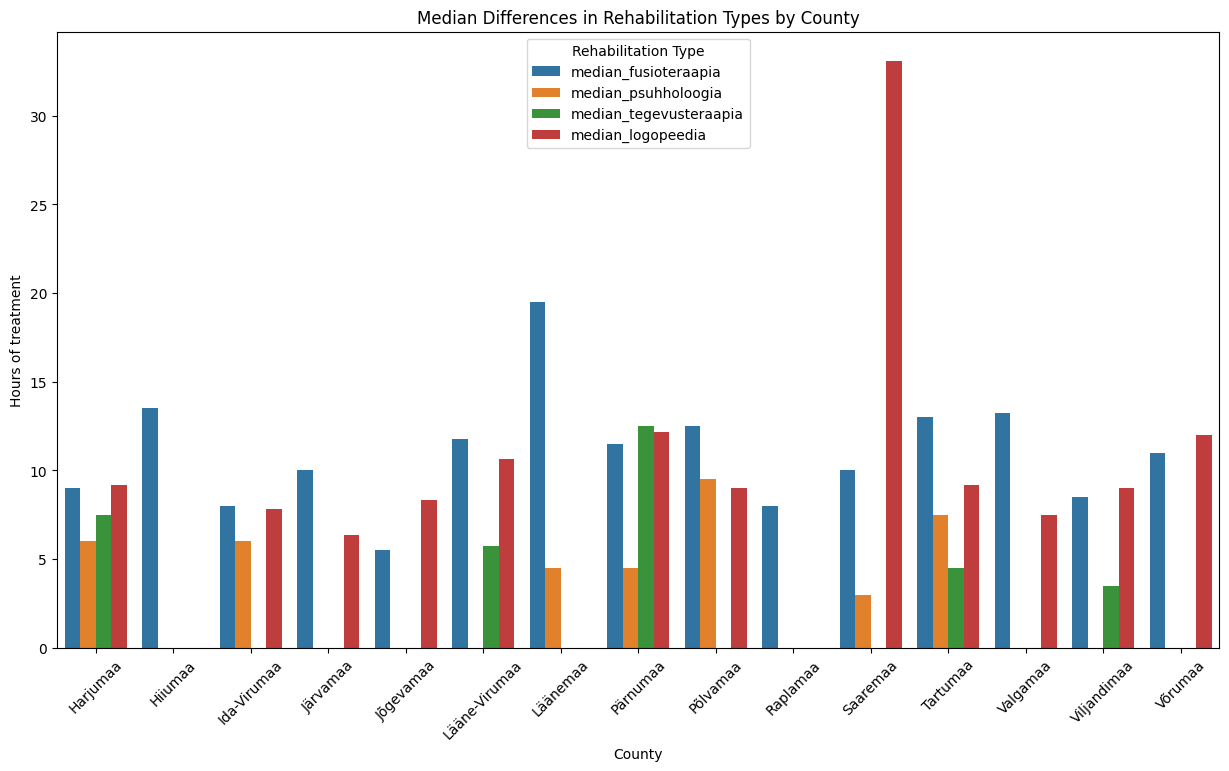

In [ ]:
# Re-importing pandas as the code execution state was reset
import pandas as pd

# Reload the original dataset for the revised analysis with county information
file_path = '/work/filtreeritud_valim_cleaned.csv'
df_original = pd.read_csv(file_path)

# Function to perform the revised operations for each rehabilitation type with county grouping
def analyze_rehab_by_county(df, rehab_type):
    ar_column = f"{rehab_type}_ar"
    a1_column = f"{rehab_type}_1a"

    if ar_column in df.columns and a1_column in df.columns:
        # Remove rows where the "_ar" column is empty or "_ar" is equal to "_1a"
        df_rehab = df.dropna(subset=[ar_column])
        df_rehab = df_rehab[df_rehab[ar_column] != df_rehab[a1_column]]

        # Subtract "_ar" from "_1a" and add county information
        df_rehab[f"{rehab_type}_difference"] = df_rehab[a1_column] - df_rehab[ar_column]
        df_rehab = df_rehab[['raviasutuse_maakond', f"{rehab_type}_difference"]]

        # Group by county and calculate the median
        median_by_county = df_rehab.groupby('raviasutuse_maakond').median().reset_index()
        median_by_county = median_by_county.rename(columns={f"{rehab_type}_difference": f"median_{rehab_type}"})
        
        return median_by_county
    else:
        return None

# Analyze each rehabilitation type with revised criteria and county grouping
fusioteraapia_by_county = analyze_rehab_by_county(df_original, "fusioteraapia")
psuhholoogia_by_county = analyze_rehab_by_county(df_original, "psuhholoogia")
tegevusteraapia_by_county = analyze_rehab_by_county(df_original, "tegevusteraapia")
logopeedia_by_county = analyze_rehab_by_county(df_original, "logopeedia")

fusioteraapia_by_county.head(), psuhholoogia_by_county.head(), tegevusteraapia_by_county.head(), logopeedia_by_county.head()


import matplotlib.pyplot as plt
import seaborn as sns

# Merging the datasets for a combined graph
merged_data = fusioteraapia_by_county.merge(
    psuhholoogia_by_county, on='raviasutuse_maakond', how='outer'
).merge(
    tegevusteraapia_by_county, on='raviasutuse_maakond', how='outer'
).merge(
    logopeedia_by_county, on='raviasutuse_maakond', how='outer'
)

# Melting the dataframe for easier plotting with seaborn
melted_data = pd.melt(merged_data, id_vars='raviasutuse_maakond', var_name='Rehabilitation Type', value_name='Median Difference')

# Creating a combined graph
plt.figure(figsize=(15, 8))
sns.barplot(x='raviasutuse_maakond', y='Median Difference', hue='Rehabilitation Type', data=melted_data)
plt.xticks(rotation=45)
plt.title('Median Differences in Rehabilitation Types by County')
plt.ylabel('Hours of treatment')
plt.xlabel('County')
plt.legend(title='Rehabilitation Type')

# Display the graph
plt.show()



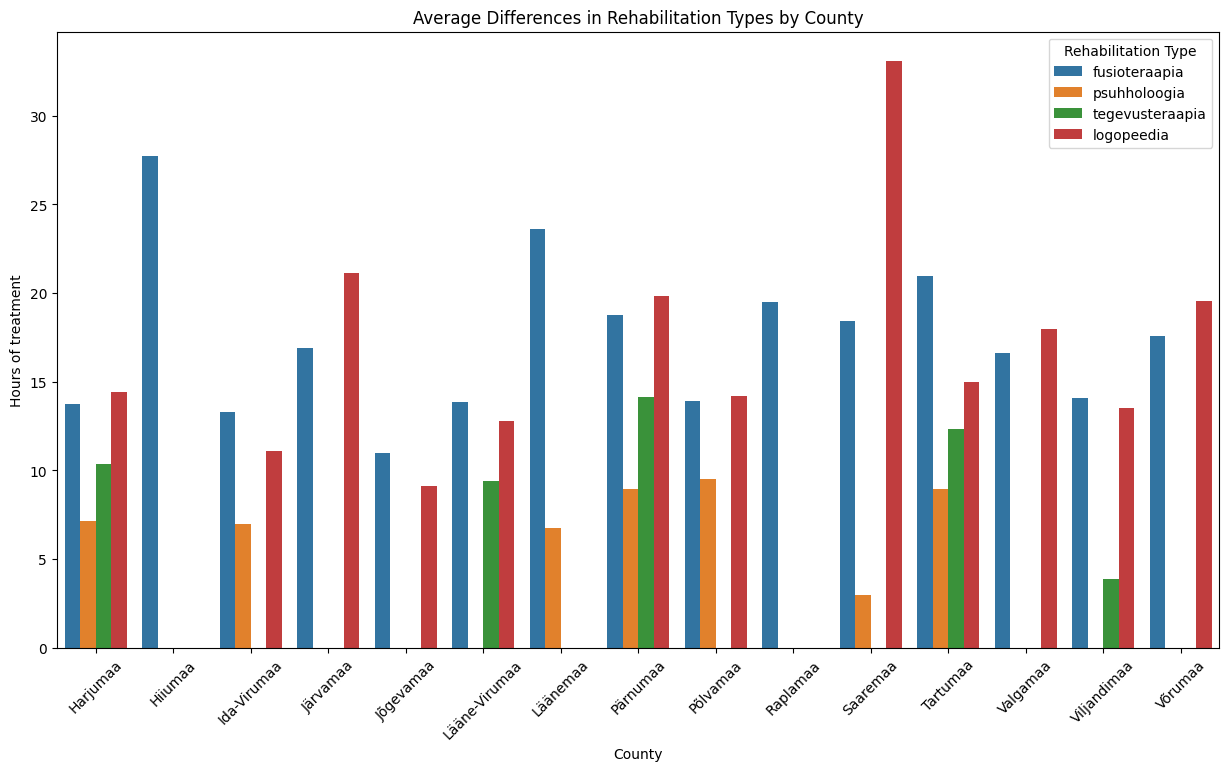

In [ ]:
# Function to calculate averages for each rehabilitation type with county grouping
def calculate_averages_by_county(df, rehab_type):
    ar_column = f"{rehab_type}_ar"
    a1_column = f"{rehab_type}_1a"

    if ar_column in df.columns and a1_column in df.columns:
        # Remove rows where the "_ar" column is empty or "_ar" is equal to "_1a"
        df_rehab = df.dropna(subset=[ar_column])
        df_rehab = df_rehab[df_rehab[ar_column] != df_rehab[a1_column]]

        # Subtract "_ar" from "_1a" and add county information
        df_rehab[f"{rehab_type}_difference"] = df_rehab[a1_column] - df_rehab[ar_column]
        df_rehab = df_rehab[['raviasutuse_maakond', f"{rehab_type}_difference"]]

        # Group by county and calculate the average
        average_by_county = df_rehab.groupby('raviasutuse_maakond').mean().reset_index()
        average_by_county = average_by_county.rename(columns={f"{rehab_type}_difference": f"average_{rehab_type}"})
        
        return average_by_county
    else:
        return None

# Calculate averages for each rehabilitation type with county grouping
fusioteraapia_average = calculate_averages_by_county(df_original, "fusioteraapia")
psuhholoogia_average = calculate_averages_by_county(df_original, "psuhholoogia")
tegevusteraapia_average = calculate_averages_by_county(df_original, "tegevusteraapia")
logopeedia_average = calculate_averages_by_county(df_original, "logopeedia")

# Merging the datasets for averages
merged_averages = fusioteraapia_average.merge(
    psuhholoogia_average, on='raviasutuse_maakond', how='outer'
).merge(
    tegevusteraapia_average, on='raviasutuse_maakond', how='outer'
).merge(
    logopeedia_average, on='raviasutuse_maakond', how='outer'
)

merged_averages.head()


# Melting the dataframe for easier plotting with seaborn (for averages)
melted_averages = pd.melt(merged_averages, id_vars='raviasutuse_maakond', var_name='Rehabilitation Type', value_name='Average Difference')

# Adjusting the Rehabilitation Type names for clarity in the graph
melted_averages['Rehabilitation Type'] = melted_averages['Rehabilitation Type'].str.replace('average_', '')

# Creating a combined graph for averages
plt.figure(figsize=(15, 8))
sns.barplot(x='raviasutuse_maakond', y='Average Difference', hue='Rehabilitation Type', data=melted_averages)
plt.xticks(rotation=45)
plt.title('Average Differences in Rehabilitation Types by County')
plt.ylabel('Hours of treatment')
plt.xlabel('County')
plt.legend(title='Rehabilitation Type')

# Display the graph
plt.show()



In [ ]:
!pip install geoplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 75.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 79.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 114.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 106.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 11.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.2.5
    Not uninstalling pandas at /shared-libs/python3.9/py/lib/python3.9/site-packages, outside environment /root/venv
    Can't uninstall 'pandas'. No files were found to uninstall.

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip inst

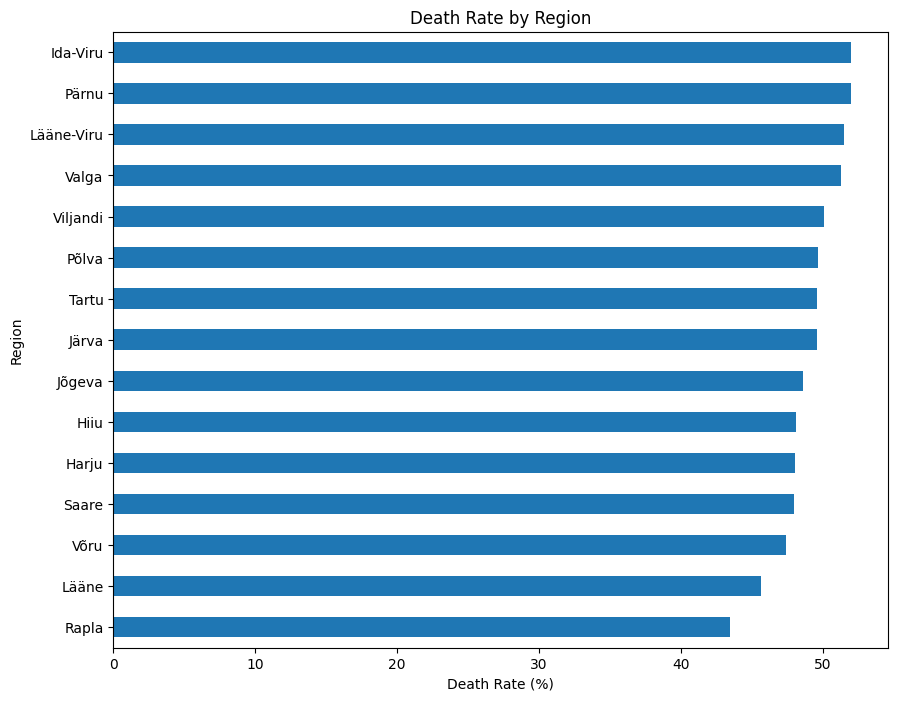

In [ ]:
# Calculate the death count for each region
death_count = filtreeritud_valim_cleaned[filtreeritud_valim_cleaned['staatus_surm'] == 1]['maakond'].value_counts()

# Calculate the total count for each region
total_count = filtreeritud_valim_cleaned['maakond'].value_counts()

# Calculate the death rate for each region
death_rate = (death_count / total_count) * 100

# Create a bar plot for the death rate by region
death_rate.sort_values().plot(kind='barh', figsize=(10,8))

plt.xlabel('Death Rate (%)')
plt.ylabel('Region')
plt.title('Death Rate by Region')
plt.show()

In [ ]:
# Check columns in df_therapy
df_therapy.columns.tolist()

['Unnamed: 0',
 'id',
 'vanus',
 'sugu',
 'maakond',
 'pohidiagnoos',
 'charlson_total_quan',
 'charlson_total_original',
 'elixhauser_total_vw',
 'elixhauser_total_swiss',
 'surmakp',
 'aeg_surm',
 'staatus_surm',
 'arve_nr',
 'aasta',
 'aastaid_algusest',
 'ar_algus',
 'ar_lopp',
 'raviasutuse_nimi',
 'raviasutuse_ehak',
 'raviasutuse_maakond',
 'raviasutuse_linn',
 'ravityyp',
 'eriala',
 'valtimatu',
 'raviarve_summa',
 'fusioteraapia_ar',
 'fusioteraapia_1a',
 'algusaeg_jarelravi_fusioteraapia',
 'algusstaatus_jarelravi_fusioteraapia',
 'lopuaeg_fusioteraapia',
 'lopustaatus_fusioteraapia',
 'logopeedia_ar',
 'logopeedia_1a',
 'algusaeg_jarelravi_logopeedia',
 'algusstaatus_jarelravi_logopeedia',
 'lopuaeg_logopeedia',
 'lopustaatus_logopeedia',
 'psuhholoogia_ar',
 'psuhholoogia_1a',
 'algusaeg_jarelravi_psuhholoogia',
 'algusstaatus_jarelravi_psuhholoogia',
 'lopuaeg_psuhholoogia',
 'lopustaatus_psuhholoogia',
 'tegevusteraapia_ar',
 'tegevusteraapia_1a',
 'algusaeg_jarelravi_te

In [ ]:
# Extract df_therapy_type for 'fusioteraapia_ar' and check its columns
df_therapy_type = df_therapy[df_therapy["fusioteraapia_ar"].notna()]

# Check columns in df_therapy_type
df_therapy_type.columns.tolist()

['Unnamed: 0',
 'id',
 'vanus',
 'sugu',
 'maakond',
 'pohidiagnoos',
 'charlson_total_quan',
 'charlson_total_original',
 'elixhauser_total_vw',
 'elixhauser_total_swiss',
 'surmakp',
 'aeg_surm',
 'staatus_surm',
 'arve_nr',
 'aasta',
 'aastaid_algusest',
 'ar_algus',
 'ar_lopp',
 'raviasutuse_nimi',
 'raviasutuse_ehak',
 'raviasutuse_maakond',
 'raviasutuse_linn',
 'ravityyp',
 'eriala',
 'valtimatu',
 'raviarve_summa',
 'fusioteraapia_ar',
 'fusioteraapia_1a',
 'algusaeg_jarelravi_fusioteraapia',
 'algusstaatus_jarelravi_fusioteraapia',
 'lopuaeg_fusioteraapia',
 'lopustaatus_fusioteraapia',
 'logopeedia_ar',
 'logopeedia_1a',
 'algusaeg_jarelravi_logopeedia',
 'algusstaatus_jarelravi_logopeedia',
 'lopuaeg_logopeedia',
 'lopustaatus_logopeedia',
 'psuhholoogia_ar',
 'psuhholoogia_1a',
 'algusaeg_jarelravi_psuhholoogia',
 'algusstaatus_jarelravi_psuhholoogia',
 'lopuaeg_psuhholoogia',
 'lopustaatus_psuhholoogia',
 'tegevusteraapia_ar',
 'tegevusteraapia_1a',
 'algusaeg_jarelravi_te

In [ ]:
!pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 22.9 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=1313422e19c642bf308bf2c231a908b7434aca1245253956efc3c2b8ac68556e
  Stored in directory: /root/.cache/pip/wheels/a8/03/64/8557323821d25118c3a2dc1646996f7a962a8970d4b7d22473
Successfully built autograd-gamma

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
!pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 19.0 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=608683f0782fe184a930f8453ca59a75df9f4e7c9a1fbe70493fd44627733859
  Stored in directory: /root/.cache/pip/wheels/a8/03/64/8557323821d25118c3a2dc1646996f7a962a8970d4b7d22473
Successfully built autograd-gamma

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


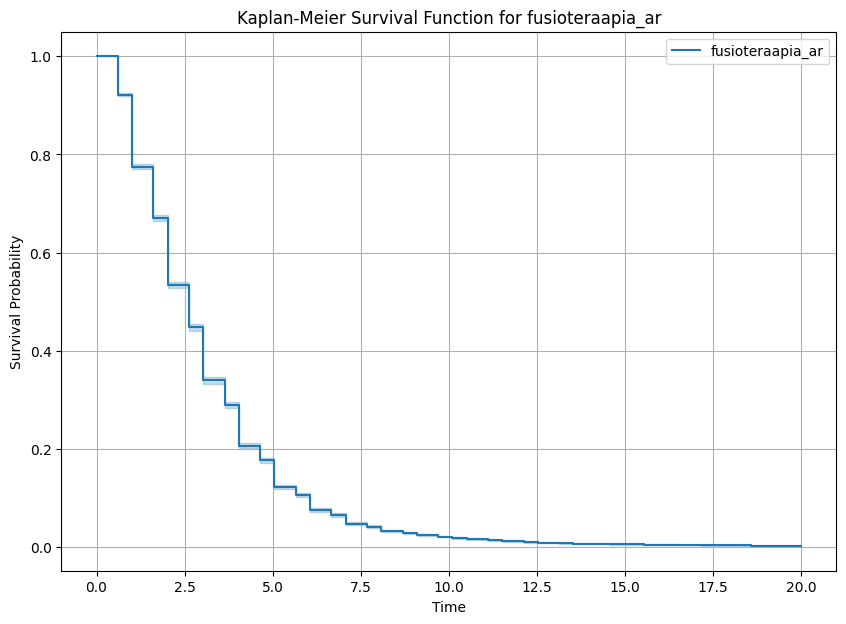

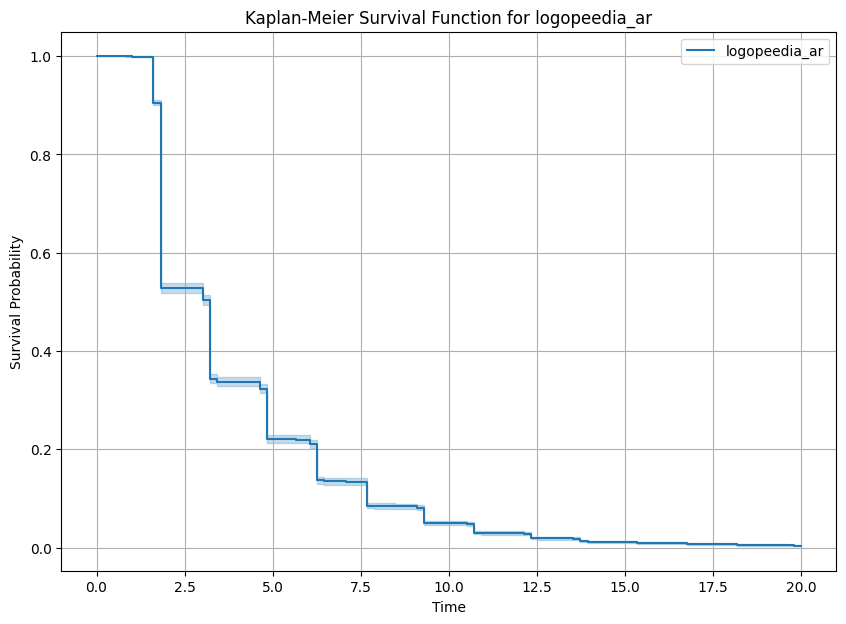

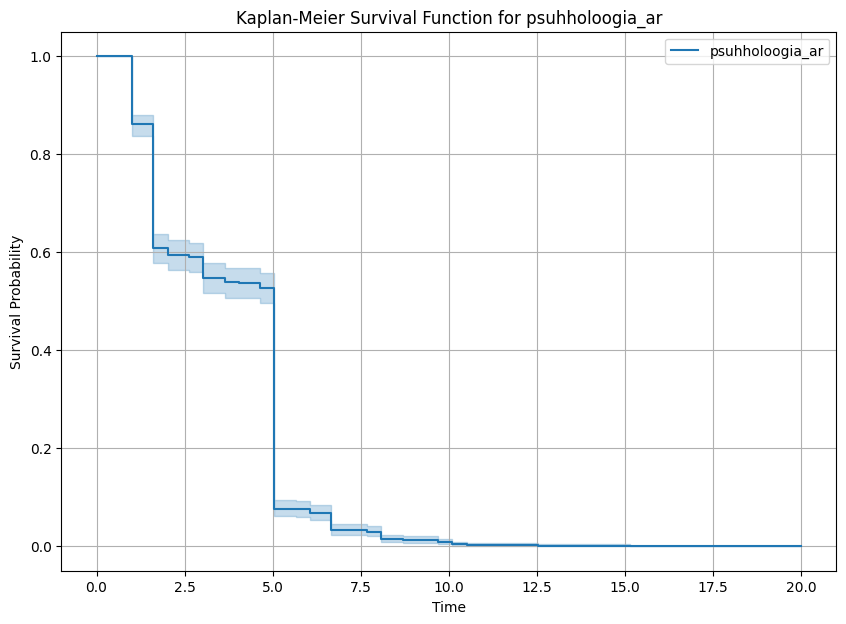

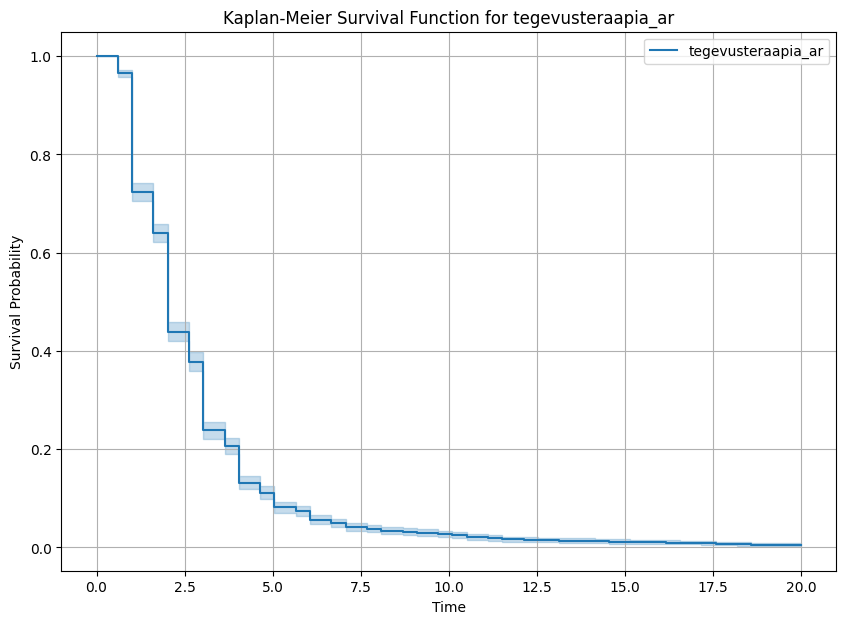

{'fusioteraapia_ar': <lifelines.KaplanMeierFitter:"KM_estimate", fitted with 21505 total observations, 0 right-censored observations>,
 'logopeedia_ar': <lifelines.KaplanMeierFitter:"KM_estimate", fitted with 9892 total observations, 0 right-censored observations>,
 'psuhholoogia_ar': <lifelines.KaplanMeierFitter:"KM_estimate", fitted with 1020 total observations, 0 right-censored observations>,
 'tegevusteraapia_ar': <lifelines.KaplanMeierFitter:"KM_estimate", fitted with 2378 total observations, 0 right-censored observations>}

In [ ]:
# Import required module
import numpy as np
from lifelines import KaplanMeierFitter  # Import KaplanMeierFitter
import matplotlib.pyplot as plt

# Define rehabilitation process types
therapy_columns_fv = ["fusioteraapia_ar", "logopeedia_ar", "psuhholoogia_ar", "tegevusteraapia_ar"]

# Prepare a dictionary to store KaplanMeierFitter objects for each rehabilitation type
kmf_by_rehabilitation = {}

for therapy in therapy_columns_fv:
    # Create a sub dataframe for each specific therapy type
    df_therapy_type = filtreeritud_valim_cleaned.loc[filtreeritud_valim_cleaned[therapy].notna(), :]

    # Duration should be positive, event = 1, if the duration of therapy is nonzero, for purposes of this analysis
    # Consider only rows with nonzero duration
    df_therapy_type = df_therapy_type[df_therapy_type[therapy] > 0]
    df_therapy_type[therapy + '_event'] = (df_therapy_type[therapy] > 0).astype(int)

    # Prepare timeline from 0 to max duration
    timeline = np.linspace(0, 20, 100)

    # Fit the KM estimator for the specific therapy type
    kmf = KaplanMeierFitter()
    kmf.fit(df_therapy_type[therapy], event_observed=df_therapy_type[therapy + '_event'], timeline=timeline)
    kmf_by_rehabilitation[therapy] = kmf

    # Plot the results for each therapy type in a separate graph
    plt.figure(figsize=(10, 7))
    kmf.plot(label=therapy)
    plt.title(f'Kaplan-Meier Survival Function for {therapy}')
    plt.xlabel('Time')
    plt.ylabel('Survival Probability')
    plt.grid(True)
    plt.legend()
    plt.show()
    
kmf_by_rehabilitation

In [ ]:
# Filter the dataset for non-empty 'logopeedia_1a' and 'logopeedia_ar' values and where they are not the same
# specifically for 'Saaremaa' in 'raviasutuse_maakond'
logopeedia_saaremaa_filtered = df_original[
    (df_original['raviasutuse_maakond'] == 'Saaremaa') &
    (df_original['logopeedia_1a'].notna()) & 
    (df_original['logopeedia_ar'].notna()) &
    (df_original['logopeedia_1a'] != df_original['logopeedia_ar'])
][['logopeedia_1a', 'logopeedia_ar']]

# Display the filtered rows
logopeedia_saaremaa_filtered_values = logopeedia_saaremaa_filtered.values.tolist()
logopeedia_saaremaa_filtered_values


[[30.16666667, 1.5], [39.0, 1.5]]

In [ ]:
!pip install statsmodels==0.14.0

In [ ]:
!pip install statsmodels==0.14.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 85.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 17.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


                 vanus  staatus_surm
vanus         1.000000      0.348945
staatus_surm  0.348945      1.000000


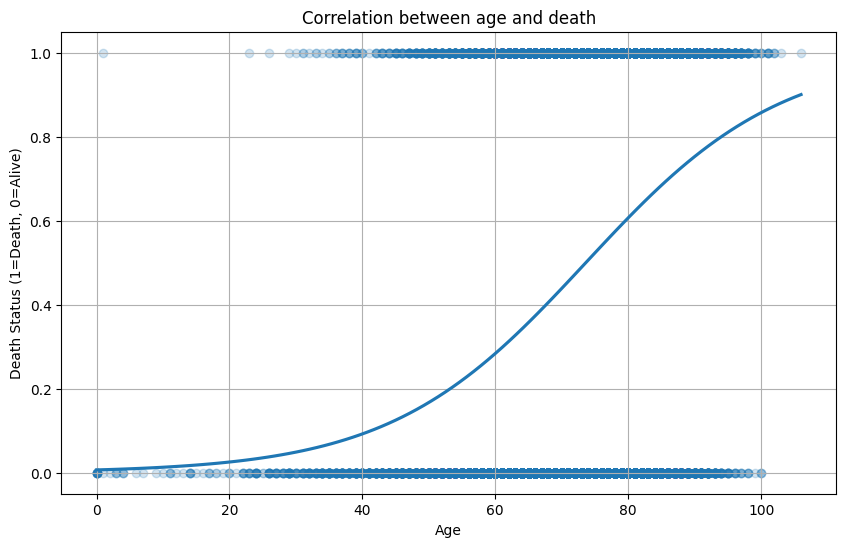

In [ ]:
# Calculate the correlation between 'vanus' (age) and 'staatus_surm' (death status)
correlation_age_death = filtreeritud_valim_cleaned[['vanus', 'staatus_surm']].corr()

print(correlation_age_death)

import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the correlation between 'vanus' and 'staatus_surm' using a scatter plot and fitting a regression line

# Filter out rows with missing values in 'vanus' or 'staatus_surm' for a cleaner plot
plot_data = filtreeritud_valim_cleaned.dropna(subset=['vanus', 'staatus_surm'])

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(x='vanus', y='staatus_surm', data=plot_data, logistic=True, ci=None, scatter_kws={'alpha':0.2})
plt.title('Correlation between age and death')
plt.xlabel('Age')
plt.ylabel('Death Status (1=Death, 0=Alive)')
plt.grid(True)
plt.show()


/tmp/ipykernel_37/583768792.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtreeritud_valim_cleaned['ar_algus'] = pd.to_datetime(filtreeritud_valim_cleaned['ar_algus'], format='%d/%m/%Y', errors='coerce')
/tmp/ipykernel_37/583768792.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtreeritud_valim_cleaned['surmakp'] = pd.to_datetime(filtreeritud_valim_cleaned['surmakp'], format='%d/%m/%Y', errors='coerce')
/tmp/ipykernel_37/583768792.py:13: SettingWithCopyWarning: 
A value is trying to be set on

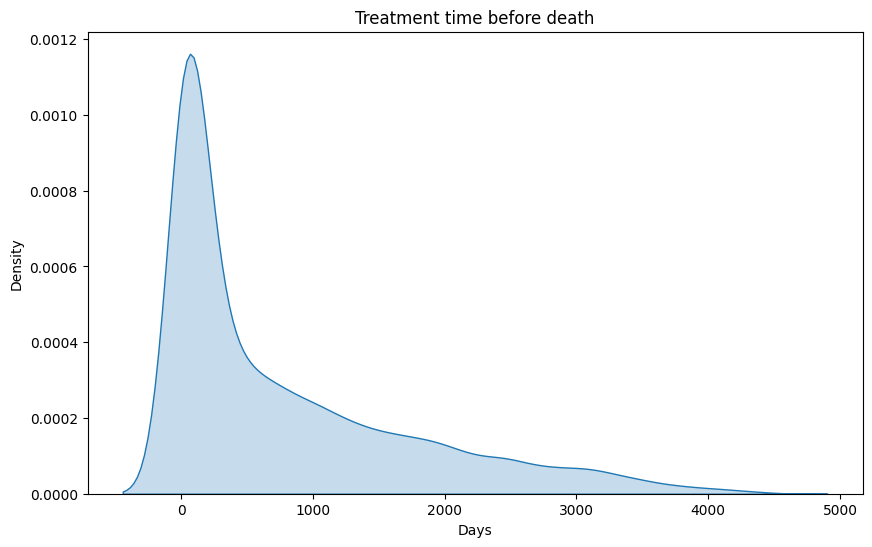

In [ ]:
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'filtreeritud_valim_cleaned' is your DataFrame
# Convert 'ar_algus' and 'surmakp' to datetime format and filter out rows where 'surmakp' is empty
filtreeritud_valim_cleaned['ar_algus'] = pd.to_datetime(filtreeritud_valim_cleaned['ar_algus'], format='%d/%m/%Y', errors='coerce')
filtreeritud_valim_cleaned['surmakp'] = pd.to_datetime(filtreeritud_valim_cleaned['surmakp'], format='%d/%m/%Y', errors='coerce')
data = filtreeritud_valim_cleaned.dropna(subset=['surmakp'])

# Calculate the duration between 'ar_algus' and 'surmakp'
data['treatment_duration'] = (data['surmakp'] - data['ar_algus']).dt.days

# KDE plot for treatment duration
plt.figure(figsize=(10, 6))
sns.kdeplot(data['treatment_duration'], shade=True)
plt.title('Treatment time before death')
plt.xlabel('Days')
plt.ylabel('Density')
plt.show()


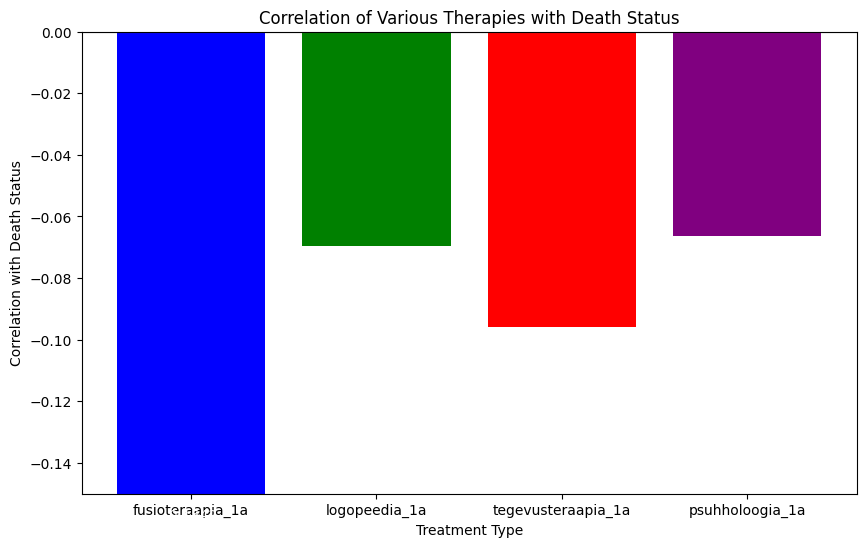

In [ ]:
from scipy.stats import pointbiserialr
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = '/work/filtreeritud_valim_cleaned.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Relevant columns for the analysis
relevant_columns = ['staatus_surm', 'fusioteraapia_1a', 'logopeedia_1a', 'tegevusteraapia_1a', 'psuhholoogia_1a']

# Remove rows with empty values in the relevant columns
data_cleaned = data.dropna(subset=relevant_columns)

# Calculate the point-biserial correlation coefficients for each treatment type
correlations = {}
for treatment in relevant_columns[1:]:
    corr, p_val = pointbiserialr(data_cleaned['staatus_surm'], data_cleaned[treatment])
    correlations[treatment] = corr

# Creating lists for treatment types and their corresponding correlations
treatment_types = list(correlations.keys())
correlation_values = list(correlations.values())

# Creating the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(treatment_types, correlation_values, color=['blue', 'green', 'red', 'purple'])

# Adding labels and title
plt.xlabel('Treatment Type')
plt.ylabel('Correlation with Death Status')
plt.title('Correlation of Various Therapies with Death Status')
plt.axhline(0, color='grey', linewidth=0.8)
plt.ylim(-0.15, 0)  # Assuming all correlations are negative as observed

# Adding the correlation values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - 0.005, round(yval, 4), ha='center', va='bottom', color='white')

plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

import pandas as pd

# Re-loading the dataset as the code execution state was reset
file_path = '/work/filtreeritud_valim_cleaned.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
data_info = data.info()
data_head = data.head()

data_info, data_head


# Selecting a subset of potentially relevant features
# Including demographic information, treatment details, and health indices
selected_features = ['vanus', 'sugu', 'charlson_total_quan', 
                     'elixhauser_total_vw', 'fusioteraapia_1a', 
                     'logopeedia_1a', 'tegevusteraapia_1a', 'psuhholoogia_1a']
target = 'staatus_surm'

# Preparing the feature set and target variable
X = data[selected_features]
y = data[target]

# Handling missing values and encoding categorical variables
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Creating a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a pipeline with preprocessing and the classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Training the model
pipeline.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Evaluation metrics
classification_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

classification_report, roc_auc


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23304 entries, 0 to 23303
Columns: 105 entries, Unnamed: 0 to teenused_ar
dtypes: float64(30), int64(58), object(17)
memory usage: 18.7+ MB


('              precision    recall  f1-score   support\n\n           0       0.66      0.67      0.67      3610\n           1       0.64      0.64      0.64      3382\n\n    accuracy                           0.65      6992\n   macro avg       0.65      0.65      0.65      6992\nweighted avg       0.65      0.65      0.65      6992\n',
 0.7071686343375636)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Load the dataset
file_path = '/work/filtreeritud_valim_cleaned.csv'
data = pd.read_csv(file_path)

# Feature Engineering
data['age_squared'] = data['vanus'] ** 2

# Selected features
selected_features = ['vanus', 'sugu', 'charlson_total_quan', 'elixhauser_total_vw', 
                     'fusioteraapia_1a', 'logopeedia_1a', 'tegevusteraapia_1a', 
                     'psuhholoogia_1a', 'age_squared']
target = 'staatus_surm'

# Preparing the feature set and target variable
X = data[selected_features]
y = data[target]

# Handling missing values and encoding categorical variables
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Creating a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Creating a pipeline with preprocessing and the classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Hyperparameter tuning
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    # Add other parameters here if needed
}
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Best parameters and cross-validation scores
best_params = grid_search.best_params_
cv_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5, scoring='roc_auc')

# Training the final model
final_model = grid_search.best_estimator_
final_model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred = final_model.predict(X_test)
y_pred_proba = final_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Output results
print("Best Parameters:", best_params)
print("Cross-Validation ROC-AUC:", cv_scores.mean())
print("Classification Report:\n", classification_rep)
print("ROC-AUC Score:", roc_auc)


Best Parameters: {'classifier__max_depth': 10, 'classifier__n_estimators': 200}
Cross-Validation ROC-AUC: 0.7358474995438133
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.68      0.69      3610
           1       0.67      0.69      0.68      3382

    accuracy                           0.69      6992
   macro avg       0.69      0.69      0.69      6992
weighted avg       0.69      0.69      0.69      6992

ROC-AUC Score: 0.7479866934446828


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8c5559e3-123b-47b1-8a7e-b1ae1bb2fe1f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>